In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime 

### This is link of Source 
https://platform.stratascratch.com/data-projects/delivery-duration-prediction

In [155]:
# Read the File 
df = pd.read_csv("historical_data.csv")

In [156]:
backup = df.copy()
# its useful for big dataset, loading again a dataset can take a time

In [157]:
df.head()
# observe the data

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [158]:
df.describe()
# need some data cleaning 
# avg 3 items are ordered by coustomers
# estimate avg time to
# avg time from res to cust is 9 min and max is 34 min

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
mean,2.978706,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
std,1.524867,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


In [159]:
df.info()
# here we can see col (1,2) need to be datetime insted object
# in big dataset int and float conversion also matters


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

### Convert datatype from object to datetime

In [160]:
df.created_at = pd.to_datetime(df.created_at)
df.actual_delivery_time = pd.to_datetime(df.actual_delivery_time)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     196441 non-null  float64       
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  int64         
 4   store_primary_category                        192668 non-null  object        
 5   order_protocol                                196433 non-null  float64       
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

## Feature Creation or Engineering 

### Let's Start with Target variable 
#### Total del Time = Time at delivery  - Order creation at

In [163]:
# doordash to rest >> food prep >> rest to coustomer 
# lets  calculate total non prep duration 
df['total_del_time'] = df.actual_delivery_time - df.created_at
df['non_prep_duration'] = df['estimated_store_to_consumer_driving_duration']+ df['estimated_order_place_duration']

In [164]:
df['total_del_time']=df['total_del_time'].astype('timedelta64[s]')

In [165]:
df.info()
# any operation between datetime cols gives time delta  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 18 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     196441 non-null  float64       
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  int64         
 4   store_primary_category                        192668 non-null  object        
 5   order_protocol                                196433 non-null  float64       
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

### Busy Dashers Ratio
- the number of busy and available dashers is At the time of order creation 
- and it changes time to time 
- we will create new variable busy dashers ratio = busy / onshift dashers

In [166]:
df['busy_dashers_ratio'] = df.total_busy_dashers / df.total_onshift_dashers
# high busy dashers ratio means longer delivery duaration 

In [167]:
df.info()
# now here total del time is time delta and i have to extract time in min to calculate total prp time 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 19 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     196441 non-null  float64       
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  int64         
 4   store_primary_category                        192668 non-null  object        
 5   order_protocol                                196433 non-null  float64       
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

# data preparation for modeling 


In [168]:
# Let's use one-hot encoding for id's
# check id's and decide to encode or not 
df.market_id.nunique()

6

In [169]:
df.store_id.nunique()
# can't use for one-hot encoding

6743

In [170]:
df.order_protocol.nunique()

7

- From observation we can apply one hot encoding on market id and order protocol
- not on store id

In [171]:
# using get_dummies function in pandas
# for market_id

market_id_dummies = pd.get_dummies(df.market_id).add_prefix('market_id')
market_id_dummies 

,market_id1.0,market_id2.0,market_id3.0,market_id4.0,market_id5.0,market_id6.0
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
197423,1,0,0,0,0,0
197424,1,0,0,0,0,0
197425,1,0,0,0,0,0
197426,1,0,0,0,0,0


In [172]:
order_protocol_dummies = pd.get_dummies(df.order_protocol).add_prefix('order_protocol')
order_protocol_dummies 

,order_protocol1.0,order_protocol2.0,order_protocol3.0,order_protocol4.0,order_protocol5.0,order_protocol6.0,order_protocol7.0
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
197423,0,0,0,1,0,0,0
197424,0,0,0,1,0,0,0
197425,0,0,0,1,0,0,0
197426,1,0,0,0,0,0,0


- store catogary col has lot of null values and can be fill with most common store id catogary 
- for that we are going to create reference dictionary 
- map each store_id to most frequent cuisne catogary they have 

In [173]:
# we have calculated most frequent catogary for perticular store id and converted into dict
store_id_unique = df.store_id.unique().tolist()
store_id_and_category = {store_id: df[df.store_id == store_id].store_primary_category.mode() 
                        for store_id in store_id_unique}

In [174]:
store_id_and_category

{1845: 0    american
 Name: store_primary_category, dtype: object,
 5477: 0     indian
 1    mexican
 Name: store_primary_category, dtype: object,
 2841: 0    italian
 Name: store_primary_category, dtype: object,
 4139: 0    mexican
 Name: store_primary_category, dtype: object,
 5058: 0    italian
 Name: store_primary_category, dtype: object,
 4149: 0    sandwich
 1        thai
 Name: store_primary_category, dtype: object,
 3201: 0    cafe
 Name: store_primary_category, dtype: object,
 5054: 0    italian
 Name: store_primary_category, dtype: object,
 2004: 0    american
 Name: store_primary_category, dtype: object,
 1984: 0    chinese
 Name: store_primary_category, dtype: object,
 4905: 0    mexican
 Name: store_primary_category, dtype: object,
 1698: 0    sandwich
 Name: store_primary_category, dtype: object,
 1936: 0    singaporean
 Name: store_primary_category, dtype: object,
 6015: 0    burger
 Name: store_primary_category, dtype: object,
 976: 0    breakfast
 Name: store_primary_c

In [175]:
 
def fill(store_id):
    # return primary store catogary from the dictionary 
    try:
        return store_id_and_category[store_id].values[0]
    except:
        return np.nan

df['nan_free_store_primary_category'] = df.store_id.apply(fill)

- now it is ready to one hot encode 
- create dummies for store primary category

In [176]:
store_primary_category_dummies = pd.get_dummies(df.nan_free_store_primary_category).add_prefix('category_')
store_primary_category_dummies

,category_afghan,category_african,category_alcohol,category_alcohol-plus-food,category_american,category_argentine,category_asian,category_barbecue,category_belgian,category_brazilian,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Lets drop the original columns and replace it with these features 

In [177]:
train_df = df.drop( columns = ['created_at' , 'market_id' , 'store_id', 'order_protocol' ,'store_primary_category' , 'actual_delivery_time' , 'nan_free_store_primary_category', 
                          'total_busy_dashers','total_onshift_dashers'])
df.head()     

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_del_time,non_prep_duration,busy_dashers_ratio,nan_free_store_primary_category
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0,0.424242,american
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0,2.000000,indian
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0,0.000000,indian
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0,1.000000,indian
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0,1.000000,indian


In [178]:
# concat all col together
train_df = pd.concat([train_df, order_protocol_dummies, market_id_dummies, store_primary_category_dummies],axis=1)

In [179]:
train_df

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_del_time,non_prep_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4,3441,4,557,1239,21.0,446,861.0,3779.0,1307.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1900,1,1400,1400,2.0,446,690.0,4024.0,1136.0,...,0,0,0,0,0,0,0,0,0,0
2,1,1900,1,1900,1900,0.0,446,690.0,1781.0,1136.0,...,0,0,0,0,0,0,0,0,0,0
3,6,6900,5,600,1800,2.0,446,289.0,3075.0,735.0,...,0,0,0,0,0,0,0,0,0,0
4,3,3900,3,1100,1600,9.0,446,650.0,2390.0,1096.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,3,1389,3,345,649,23.0,251,331.0,3907.0,582.0,...,0,0,0,0,0,0,0,0,0,0
197424,6,3010,4,405,825,14.0,251,915.0,3383.0,1166.0,...,0,0,0,0,0,0,0,0,0,0
197425,5,1836,3,300,399,40.0,251,795.0,3008.0,1046.0,...,0,0,0,0,0,0,0,0,0,0
197426,1,1175,1,535,535,12.0,446,384.0,3907.0,830.0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
train_df.describe()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_del_time,non_prep_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
count,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,197428.000000,196902.000000,1.974210e+05,196902.000000,...,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000
mean,3.196391,2682.331402,2.670791,686.218470,1159.588630,58.050065,308.560179,545.358935,2.908257e+03,853.939183,...,0.000815,0.000187,0.005465,0.011300,0.000740,0.037254,0.001175,0.001433,0.004234,0.030928
std,2.666546,1823.093688,1.630255,522.038648,558.411377,52.661830,90.139653,219.352902,1.922961e+04,235.112835,...,0.028545,0.013689,0.073725,0.105701,0.027184,0.189384,0.034260,0.037834,0.064935,0.173122
min,1.000000,0.000000,1.000000,-86.000000,0.000000,-6.000000,0.000000,0.000000,1.010000e+02,153.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,251.000000,382.000000,2.104000e+03,683.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2200.000000,2.000000,595.000000,1095.000000,41.000000,251.000000,544.000000,2.660000e+03,850.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,3395.000000,3.000000,949.000000,1395.000000,85.000000,446.000000,702.000000,3.381000e+03,1017.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,411.000000,27100.000000,20.000000,14700.000000,14700.000000,285.000000,2715.000000,2088.000000,8.516859e+06,3222.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [181]:
train_df.busy_dashers_ratio.describe()
# there is problem with infinite values 
# lets leplace it with nan values

count    1.775900e+05
mean              NaN
std               NaN
min              -inf
25%      8.269231e-01
50%      9.622642e-01
75%      1.000000e+00
max               inf
Name: busy_dashers_ratio, dtype: float64

In [182]:
# check infinity values with using numpy isfinite() function
np.where(np.any(~np.isfinite(train_df),axis=0) == True)

(array([ 5,  7,  8,  9, 10], dtype=int64),)

In [183]:
# replace inf values with nan 
train_df.replace([np.inf , -np.inf], np.nan , inplace = True)

In [184]:
train_df.shape

(197428, 98)

In [185]:
# now lets drop all nan values from our dataset
train_df.dropna(inplace=True)

In [186]:
train_df.shape

(177070, 98)

## now we have to remove redundancy

- big dataset help our model yet it has drawbacks too
- when you have too many predictors it will slow us down and caous collinerity
- collineraity means that the variables are corelated to each other
- both of them have same effect on model so one of them is sufficient for your model 

In [187]:
# lets draw correlation matrix 
# it could take some time to run this cell, we are calculating 100*100 matrix
# to have better visualization we will take only one triangle 

# generate mask for the upper triangle 

corr = train_df.corr()
mask = np.triu(np.ones_like(corr, dtype= bool))

# here we assign 1 to upper part of diagonal and 0  to lower and apply mask where value is 1

<Axes: >

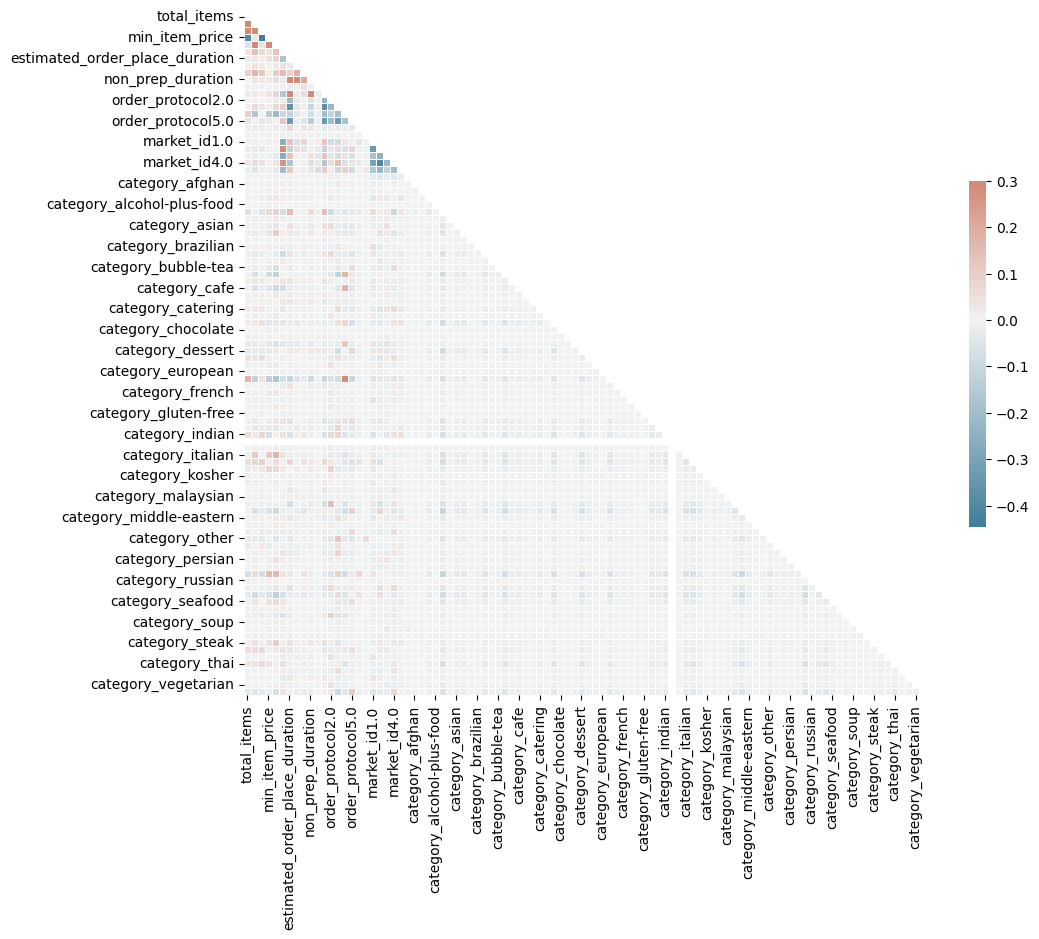

In [188]:
#set up the matplotlib figure
f, ax = plt.subplots(figsize = (11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# lets draw heatmap with the mask and correct aspect ratio
sns.heatmap(corr ,mask=mask, cmap=cmap , vmax = .3, center = 0, square=True, 
            linewidths = .5, cbar_kws = {'shrink': .5})

In [189]:
# there is something wrong with category indonesian 
train_df.category_indonesian.describe()
# we have bunch of 0 values so we can drop it 

count    177070.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: category_indonesian, dtype: float64

- Two functions to test correlations
- 1 get redundant values
- 2 find top correlated features

In [190]:
def get_redundant_pairs(df):
    #get diagonal and lower triangular pairs of correlation matrix
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

In [191]:
def get_top_abs_correlations (df, n = 5):

#Sort correlations in the descending order and return n highest results

    au_corr = df.corr().abs().unstack()
    
    labels_to_drop = get_redundant_pairs(df)
    
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    
    return au_corr[0:n]
    

In [192]:
print("Top Absolute Correlations")

print(get_top_abs_correlations (train_df, 20))

Top Absolute Correlations
estimated_store_to_consumer_driving_duration  non_prep_duration     0.923086
estimated_order_place_duration                order_protocol1.0     0.897645
total_items                                   num_distinct_items    0.758146
subtotal                                      num_distinct_items    0.682890
total_items                                   subtotal              0.557175
min_item_price                                max_item_price        0.541241
subtotal                                      max_item_price        0.507947
order_protocol4.0                             category_fast         0.489946
num_distinct_items                            min_item_price        0.446733
market_id2.0                                  market_id4.0          0.402421
total_items                                   min_item_price        0.389277
order_protocol1.0                             order_protocol3.0     0.373581
estimated_order_place_duration                orde

- we will drop some corelated features 

In [196]:
train_df = df.drop( columns = ['created_at' , 'market_id' , 'store_id', 'order_protocol' ,'store_primary_category' , 'actual_delivery_time' , 'nan_free_store_primary_category', 
                          'total_busy_dashers','total_onshift_dashers'])
df.head()  

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_del_time,non_prep_duration,busy_dashers_ratio,nan_free_store_primary_category
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0,0.424242,american
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0,2.000000,indian
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0,0.000000,indian
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0,1.000000,indian
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0,1.000000,indian


In [197]:
# concat  col together
train_df = pd.concat([train_df, order_protocol_dummies, store_primary_category_dummies],axis=1)


train_df = train_df.drop( columns =['category_indonesian','non_prep_duration'])

# align dtype over dataset

train_df = train_df.astype("float32")

#replace inf values with nan to drop all nan
train_df.replace ([np.inf, -np.inf], np.nan, inplace = True)
train_df.dropna(inplace = True)

train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_del_time,busy_dashers_ratio,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,21.0,446.0,861.0,3779.0,0.424242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,2.0,446.0,690.0,4024.0,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,0.0,446.0,690.0,1781.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,2.0,446.0,289.0,3075.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,9.0,446.0,650.0,2390.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [198]:
train_df.shape

(177070, 90)

In [199]:
# check correlation again
print("Top Absolute Correlations")

print(get_top_abs_correlations (train_df, 20))

Top Absolute Correlations
estimated_order_place_duration  order_protocol1.0     0.897645
total_items                     num_distinct_items    0.758146
subtotal                        num_distinct_items    0.682890
total_items                     subtotal              0.557175
min_item_price                  max_item_price        0.541241
subtotal                        max_item_price        0.507947
order_protocol4.0               category_fast         0.489946
num_distinct_items              min_item_price        0.446733
total_items                     min_item_price        0.389277
order_protocol1.0               order_protocol3.0     0.373581
estimated_order_place_duration  order_protocol3.0     0.364170
order_protocol1.0               order_protocol5.0     0.342345
estimated_order_place_duration  order_protocol5.0     0.333291
order_protocol3.0               order_protocol5.0     0.332533
order_protocol1.0               order_protocol2.0     0.226903
estimated_order_place_duratio

In [ ]:
# order protocol are related to each other
# lets drop corelated features again and repeat the code

In [206]:
train_df = df.drop( columns = ['created_at' , 'market_id' , 'store_id', 'order_protocol' ,'store_primary_category' , 'actual_delivery_time' , 'nan_free_store_primary_category', 
                          'total_busy_dashers','total_onshift_dashers'])
# concat  col together
train_df = pd.concat([train_df, store_primary_category_dummies],axis=1)


train_df = train_df.drop( columns =['category_indonesian','non_prep_duration'])

# align dtype over dataset
train_df = train_df.astype("float32")

#replace inf values with nan to drop all nan
train_df.replace ([np.inf, -np.inf], np.nan, inplace = True)
train_df.dropna(inplace = True)

train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_del_time,busy_dashers_ratio,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,21.0,446.0,861.0,3779.0,0.424242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,2.0,446.0,690.0,4024.0,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,0.0,446.0,690.0,1781.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,2.0,446.0,289.0,3075.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,9.0,446.0,650.0,2390.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [207]:
# check correlation again
print("Top Absolute Correlations")

print(get_top_abs_correlations (train_df, 20))

Top Absolute Correlations
total_items                                   num_distinct_items                0.758146
subtotal                                      num_distinct_items                0.682890
total_items                                   subtotal                          0.557175
min_item_price                                max_item_price                    0.541241
subtotal                                      max_item_price                    0.507947
num_distinct_items                            min_item_price                    0.446733
total_items                                   min_item_price                    0.389277
estimated_store_to_consumer_driving_duration  total_del_time                    0.188418
subtotal                                      total_del_time                    0.172312
total_outstanding_orders                      estimated_order_place_duration    0.171049
total_items                                   category_fast                     0.17

- we still have some correlated features
- let's try feture engineering - we create new variables to simplify the model and increase its accuracy by using new variables
  

# new features

In [208]:
train_df['percent_distinct_item_of_total'] = train_df.num_distinct_items / train_df.total_items
train_df['avg_price_per_item'] = train_df.subtotal / train_df.total_items
train_df.drop(columns = ['num_distinct_items' , 'subtotal'],inplace=True)
# check correlation again
print("Top Absolute Correlations")

print(get_top_abs_correlations (train_df, 20))

Top Absolute Correlations
min_item_price                                avg_price_per_item                0.860580
max_item_price                                avg_price_per_item                0.770382
min_item_price                                max_item_price                    0.541241
total_items                                   percent_distinct_item_of_total    0.445751
                                              min_item_price                    0.389277
                                              avg_price_per_item                0.310759
percent_distinct_item_of_total                avg_price_per_item                0.226711
category_pizza                                avg_price_per_item                0.225510
estimated_store_to_consumer_driving_duration  total_del_time                    0.188418
max_item_price                                percent_distinct_item_of_total    0.178021
category_fast                                 avg_price_per_item                0.17

In [212]:
train_df['price_range_of_items'] = train_df.max_item_price - train_df.min_item_price
train_df.drop(columns = ['min_item_price' , 'max_item_price'],inplace=True)

print("Top Absolute Correlations")
print(get_top_abs_correlations (train_df, 20))

Top Absolute Correlations
total_items                                   percent_distinct_item_of_total    0.445751
                                              price_range_of_items              0.333304
                                              avg_price_per_item                0.310759
percent_distinct_item_of_total                avg_price_per_item                0.226711
category_pizza                                avg_price_per_item                0.225510
estimated_store_to_consumer_driving_duration  total_del_time                    0.188418
category_fast                                 avg_price_per_item                0.175950
total_outstanding_orders                      estimated_order_place_duration    0.171049
total_items                                   category_fast                     0.170988
category_italian                              avg_price_per_item                0.158193
total_outstanding_orders                      total_del_time                    0.15

In [215]:
train_df.shape

(177070, 82)

### Multicollinearity and feature selection

In [ ]:
# VIF(variance influence factor ) factor quantifies the severity of multicollinerity
from statsmodels.stats.outliers_influence import variance_inflation